In [4]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad , tplquad, dblquad
from scipy.special import roots_legendre

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Dana Romero Bustos
*Métodos computacionales*

---

#1

Encuentre *las* integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






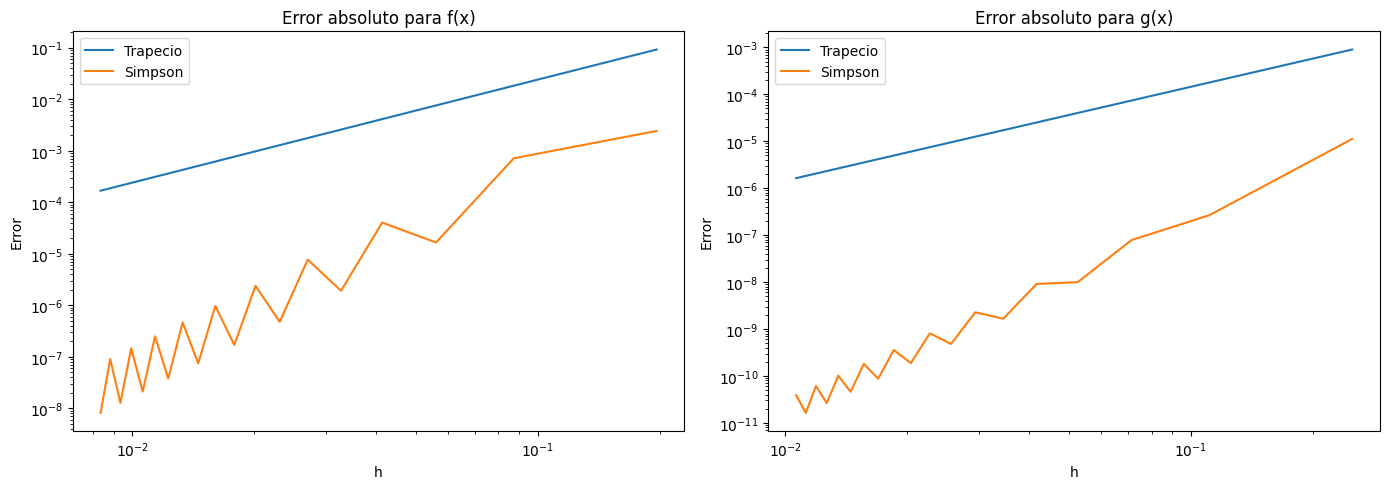

In [8]:
# Funciones a Integrar
f = lambda x: np.e**(3 * x) * np.sin(x)
g = lambda x: 1/(x * np.log(x))


# Limites de integracion
a1 , b1 = 0 , np.pi/4
a2 , b2 = np.e , 1 + np.e

# Valores exactos con quad
I_f_exact, _ = quad(f, a1, b1)
I_g_exact, _ = quad(g, a2, b2)

# Calculo de valores para h:

n_vals = np.arange(5, 100, 5)

# Calculo de la integral de f(x) variando h

h1_vals = []
error1_trap = []
error1_simp = []

for n in n_vals:
  x = np.linspace(a1, b1, n)
  y = f(x)

  h = (b1 - a1) / (n - 1)
  h1_vals.append(h)

  I_trap = trapezoid(y, x)
  I_simp = simpson(y, x)

  error1_trap.append(abs(I_trap - I_f_exact))
  error1_simp.append(abs(I_simp - I_f_exact))

# Calculo de la integral de g(x) variando h

h2_vals = []
error2_trap = []
error2_simp = []

for n in n_vals:
    x = np.linspace(a2, b2, n)
    y = g(x)

    h = (b2 - a2) / (n - 1)
    h2_vals.append(h)

    I_trap = trapezoid(y, x)
    I_simp = simpson(y, x)

    error2_trap.append(abs(I_trap - I_g_exact))
    error2_simp.append(abs(I_simp - I_g_exact))

# Grafico

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# f
ax[0].loglog(h1_vals, error1_trap, label='Trapecio')
ax[0].loglog(h1_vals, error1_simp, label='Simpson')
ax[0].set_title('Error absoluto para f(x)')
ax[0].set_xlabel('h')
ax[0].set_ylabel('Error')
ax[0].legend()

# g
ax[1].loglog(h2_vals, error2_trap, label='Trapecio')
ax[1].loglog(h2_vals, error2_simp, label='Simpson')
ax[1].set_title('Error absoluto para g(x)')
ax[1].set_xlabel('h')
ax[1].set_ylabel('Error')
ax[1].legend()

plt.tight_layout()
plt.show()

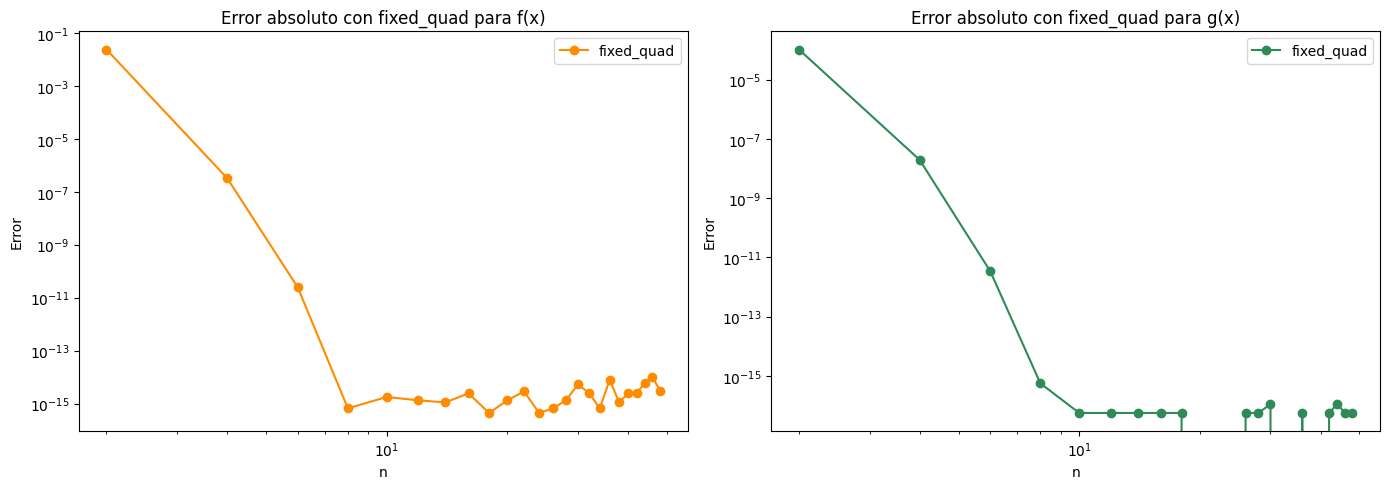

In [11]:
# Inciso 2
n_fixed = np.arange(2, 50, 2)

error_fixed_f = []
error_fixed_g = []

for n in n_fixed:
  I_fixed_f, _ = fixed_quad(f, a1, b1, n=n)
  I_fixed_g, _ = fixed_quad(g, a2, b2, n=n)

  error_fixed_f.append(abs(I_fixed_f - I_f_exact))
  error_fixed_g.append(abs(I_fixed_g - I_g_exact))

# Gráficas
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# f
ax[0].loglog(n_fixed, error_fixed_f, marker='o', color='darkorange', label='fixed_quad')
ax[0].set_title('Error absoluto con fixed_quad para f(x)')
ax[0].set_xlabel('n')
ax[0].set_ylabel('Error')
ax[0].legend()

# g
ax[1].loglog(n_fixed, error_fixed_g, marker='o', color='seagreen', label='fixed_quad')
ax[1].set_title('Error absoluto con fixed_quad para g(x)')
ax[1].set_xlabel('n')
ax[1].set_ylabel('Error')
ax[1].legend()

plt.tight_layout()
plt.show()

#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [ ]:
# Funcion a integrar
f = lambda z , y , x: (1 / y) * np.sin(z / y)

# Usando quad

def integral_mas_interna (y , x):
  integrando = lambda z : (1 / y) * np.sin(z / y)
  resultado, _ = quad(integrando, 0, x*y)
  return resultado

def integral_intermedia (x):
  integrando = lambda y: integral_mas_interna(y, x)
  resultado , _ = quad(integrando , 0 , x)
  return resultado

integral_quad, error_quad = quad(integral_intermedia, 0, np.pi)

# usando tplquad

integral_tplquad, error_tplquad = tplquad(f, 0, np.pi,
                                          lambda x: 0, lambda x: x,
                                          lambda x, y: 0, lambda x, y: x*y)

dif_resultado = abs(integral_quad - integral_tplquad)
print(f'Integral usando el metodo quad: {integral_quad} \nIntegral usando el metodo tplquad: {integral_tplquad}')
print(f'Diferencia entre los metodos: {dif_resultado}')

Integral usando el metodo quad: 6.934802200544679 
Integral usando el metodo tplquad: 6.934802200544679
Diferencia entre los metodos: 0.0


#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





Para generalizar la funcion dada, se realizó el siguiente cambio de variable

$$ x = \frac{b-a}{2} t + \frac{a+b}{2}$$
$$ x = 1 => t = b$$
$$ x = -1 => t = a$$

Asi, la integral enntre a y b seria:

$$\frac{b-a}{2}\int_{a}^b f(\frac{b-a}{2} t + \frac{a+b}{2})dt = \frac{b-a}{2}\sum_{i=o}^n w_if(\frac{b-a}{2} x_i + \frac{a+b}{2})$$

In [ ]:
def gauss_quad(func, a , b , n):
    """
    Calcula la integral de una función en el intervalo [a, b]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - a: Limite superior de la integral
    - b: Limite inferior de la ntegral
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = ((b - a)/2) * np.sum(w * func(((b - a) * x + (a + b)) / 2))
    return integral

In [ ]:
# Calculo de la integral del punto 2:

# Integral más interna
def integral_interna(y, x, n):
  integrando = lambda z: (1/y) * np.sin(z / y)
  return gauss_quad(integrando, 0, x * y, n)

# Integral intermedia
def integral_media(x, n):
  integrando = lambda y: integral_interna(y, x, n)
  return gauss_quad(integrando, 0, x, n)

# Integral externa:
def integral_externa(n):
  integrando = lambda x: integral_media(x, n)
  return gauss_quad(integrando, 0, np.pi, n)

# Ejecutar con n puntos
resultado = integral_externa(n=10)
print(f"Resultado con gauss_quad (n=10): {resultado:.10f}")

Resultado con gauss_quad (n=10): 9.1073319663


#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [ ]:
# Integral 1:

f1 = lambda x : 1/np.sqrt(np.tan(x))
a1 , b1 = 0 , np.pi / 2

# Calcular la integral impropia usando quad y especificando la singularidad
integral1_quad, abserr = quad(f1, a1, b1, points=[a1])

print(f"Resultado de la integral impropia con Quad: {integral1_quad}")
print(f"Error absoluto estimado con Quad: {abserr}")

Resultado de la integral impropia con Quad: 2.2214414690792026
Error absoluto estimado con Quad: 4.1406478246130973e-10


In [ ]:
# Limites nuevos, con el fin de evitar las singularidades sin modificar el resultado

x1 = np.linspace(1e-10, np.pi/2 - 1e-10, 10000000)

integral1_trapezoid = trapezoid(f1(x1) , x1)
integral1_simpson = simpson(f1(x1) , x1)

print(f"Resultado de la integral impropia con Trapezoid: {integral1_trapezoid}")
print(f"Resultado de la integral impropia con Simpson: {integral1_simpson}")

Resultado de la integral impropia con Trapezoid: 2.2287163356798985
Resultado de la integral impropia con Simpson: 2.226178223101299


In [2]:
# Integral 2

f2 = lambda x : np.cos(x)/(x**3)
a2 , b2 = 1 , np.inf

# Calcular la integral impropia
integral2, abserr = quad(f2, a2, b2)

print(f"Resultado de la integral impropia: {integral2}")
print(f"Error absoluto estimado: {abserr}")

Resultado de la integral impropia: 0.01811792007976691
Error absoluto estimado: 1.4789016823564538e-06


/tmp/ipython-input-2-238283821.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral2, abserr = quad(f2, a2, b2)


In [3]:
# Limites nuevos, con el fin de evitar las singularidades sin modificar el resultado
x2 = np.linspace(1 , 10000000 , 10000000)

integral2_trapezoid = trapezoid(f2(x2) , x2)
integral2_simpson = simpson(f2(x2) , x2)

print(f"Resultado de la integral impropia con Trapezoid: {integral2_trapezoid}")
print(f"Resultado de la integral impropia con Simpson: {integral2_simpson}")

Resultado de la integral impropia con Trapezoid: 0.17842185434594743
Resultado de la integral impropia con Simpson: 0.07995028022355083


In [6]:
# Integral 3
f3 = lambda y , x: 1 / np.sqrt(1 - y**2)

integral3 , error_dblquad = dblquad(f3, 0, np.pi / 4, lambda x: 0, lambda x: np.sin(x))

print(f"Resultado de la integral impropia: {integral3}")
print(f"Error absoluto estimado: {error_dblquad}")

Resultado de la integral impropia: 0.30842513753404244
Error absoluto estimado: 6.66175985287692e-14
